In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [39]:
can=load_diabetes()
df=pd.DataFrame(can.data,columns=can.feature_names)
df['target']=can.target
df.sample(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
133,-0.041840,0.05068,-0.053630,-0.040099,-0.084126,-0.071772,-0.002903,-0.039493,-0.072133,-0.030072,83.0
168,0.001751,0.05068,0.059541,-0.002228,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328,268.0
366,-0.045472,0.05068,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628,233.0


In [55]:
X =df.iloc[:, [9,10]].values

In [41]:
from sklearn.cluster import KMeans

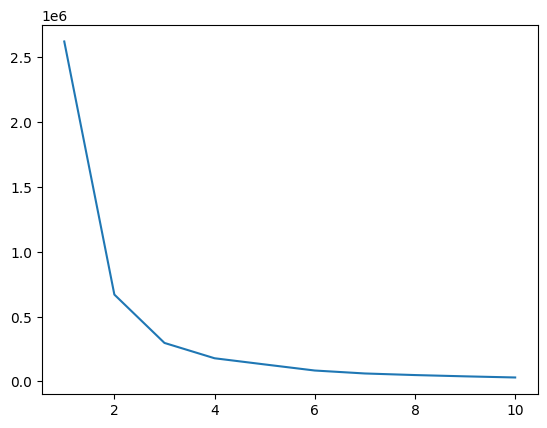

In [43]:
WCSS_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    WCSS_list.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS_list)
plt.show()

In [52]:
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(X)
y_pred=kmeans.predict(X)

d:\PYTHON\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


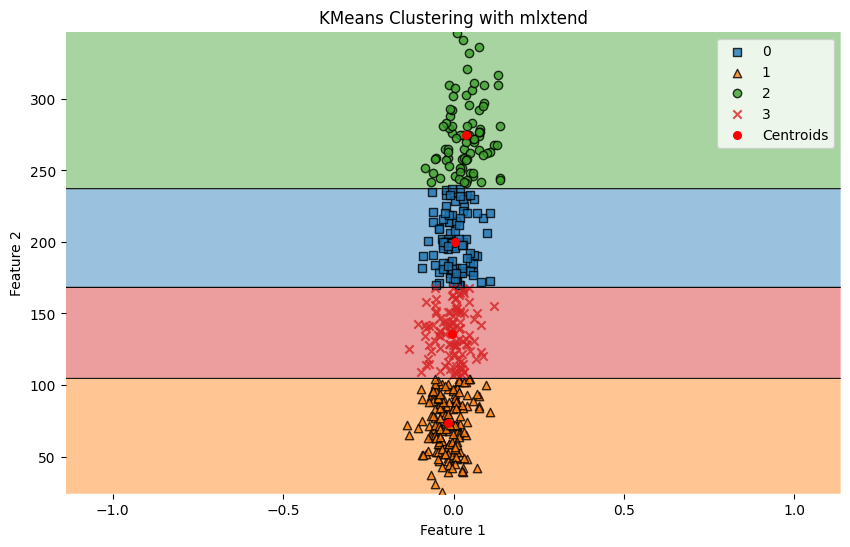

In [58]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y_pred, clf=kmeans,legend=2)

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label='Centroids')
plt.title('KMeans Clustering with mlxtend')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()